<a href="https://colab.research.google.com/github/bysuntu/Anonymize_DICOM/blob/main/ctScan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install vtk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88.3 MB 112 kB/s 


In [3]:
cd /content/drive/MyDrive/ctScan/

/content/drive/MyDrive/ctScan


617629
1.150359869003296 1.1548790037631989


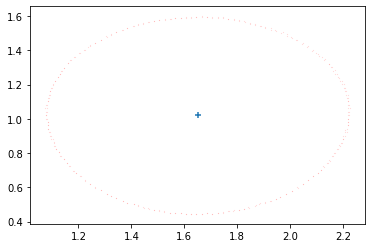

1.5602099895477295 1.5440929532051086


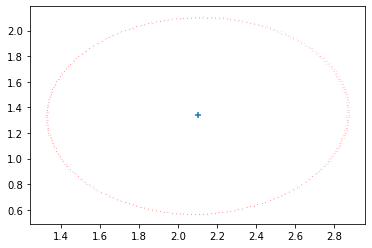

1.782639980316162 1.78140389919281


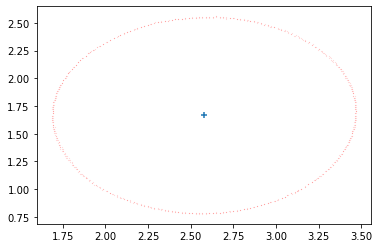

1.7652499675750732 1.7816100120544434


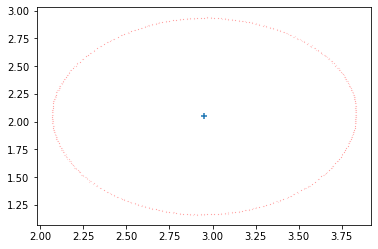

1.798719882965088 1.7645399570465088


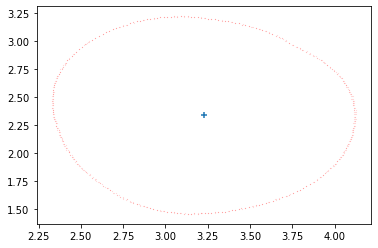

1.7741100788116455 1.7420300245285034


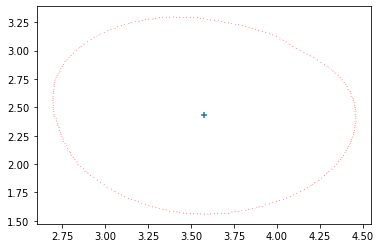

1.7572097778320312 1.7656301259994507


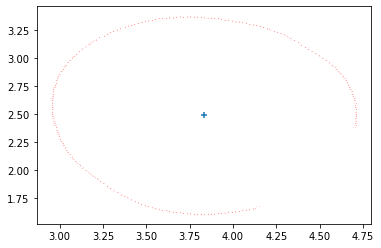

1.7588298320770264 1.7820700407028198


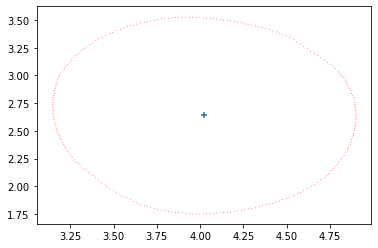

1.7600700855255127 1.7712600231170654


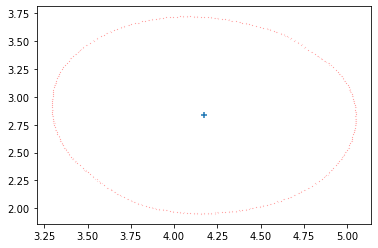

1.7580702304840088 1.7730801105499268


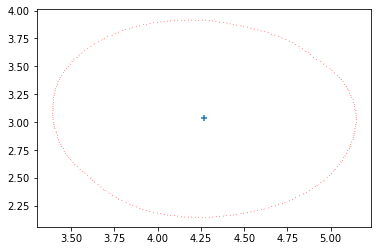

1.7631800174713135 1.7764501571655273


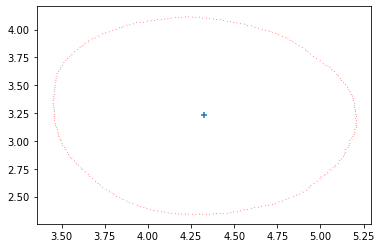

1.7583601474761963 1.7825100421905518


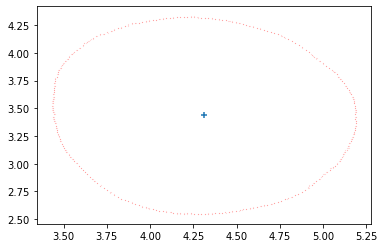

1.7540702819824219 1.784330129623413


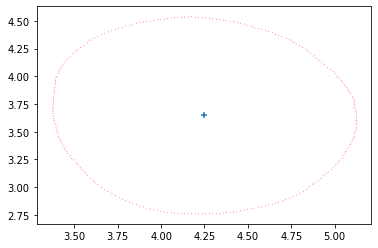

1.754729986190796 1.7900800704956055


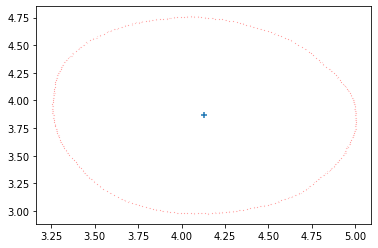

1.7545597553253174 1.807610273361206


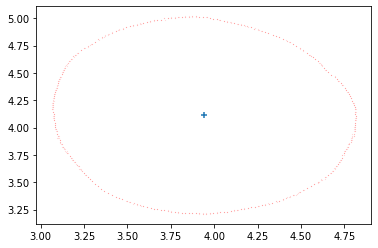

1.7561700344085693 1.810230016708374


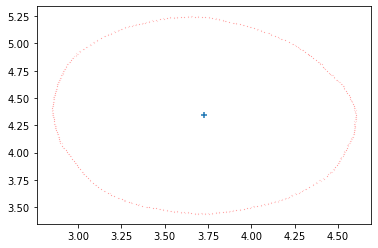

1.7535302639007568 1.8085601329803467


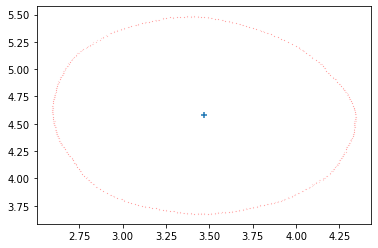

1.7521400451660156 1.817119836807251


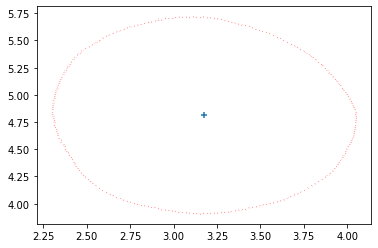

1.755850076675415 1.8168902397155762


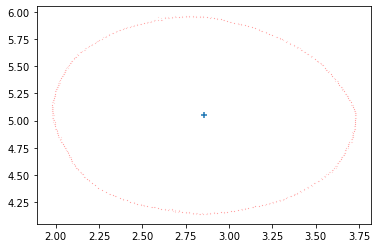

1.7631399631500244 1.820080280303955


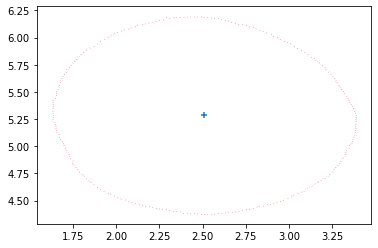

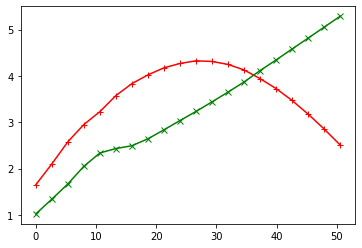

In [49]:
import vtk
import numpy as np
from matplotlib import pyplot as plt 

def readVTK(filename):
    reader = vtk.vtkPolyDataReader()
    reader.SetFileName(filename)
    reader.Update()
    polydata = reader.GetOutput()
    return polydata

def yProjection(points, num, resolution = 0.03):
    print(len(points))

    points.sort(key = lambda X:X[2])
    zAxis = np.array([row[2] for row in points])
    # print([row[2] for row in points])
    zMin, zMax = points[0][2], points[-1][2]
    Z = np.linspace(zMin, zMax, num)
    points = np.array(points)
    pointRings = [[]]*len(Z)
    
    centerLine = []
    for k in range(len(Z)):
        cur = (zAxis >= Z[k] - resolution) * (zAxis <= Z[k] + resolution)
        pointRings[k] = points[cur]
        '''
        if len(pointRings[-1]) == 0:
            continue
        '''
        cur = points[cur]
        xMin, xMax = min(cur[:, 0]), max(cur[:, 0])
        yMin, yMax = min(cur[:, 1]), max(cur[:, 1])

        xMid = (xMin + xMax) * 0.5
        yMid = (yMin + yMax) * 0.5
        print(xMax - xMin, yMax - yMin)
        plt.plot(cur[:, 0], cur[:, 1], 'r.', ms = 0.1)
        plt.scatter(xMid, yMid, marker='+')
        plt.show()

        centerLine.append([xMid, yMid])

    plt.plot(Z, [row[0] for row in centerLine], 'r+-')
    plt.plot(Z, [row[1] for row in centerLine], 'gx-')
    plt.show()
    

shell = readVTK('shell.vtk')
points = [list(shell.GetPoints().GetPoint(k)) for k in range(shell.GetNumberOfPoints())]
# points = np.array(points)

yProjection(points, 20)

plt.show()
